In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr



human_resp_path = 'human_response.csv'
chatgpt_resp_path = 'chatgpt_response.csv'

human_resp_df = pd.read_csv(human_resp_path, usecols=['Occupation', 'human_female', 'human_male', 'gender_n1'])
chatgpt_resp_df = pd.read_csv(chatgpt_resp_path, usecols=['Occupation', 'chatgpt_female', 'chatgpt_male', 'gender_n2'])

## Task 1.2

In [27]:
merged_df = pd.merge(human_resp_df, chatgpt_resp_df, on='Occupation', how='inner')


merged_df.head()

,Occupation,human_female,human_male,gender_n1,chatgpt_female,chatgpt_male,gender_n2
0,Teacher,44,20,36,62,29,10
1,Police Officer,19,45,36,30,57,13
2,Lawyer,23,29,48,52,39,9
3,Babysitter,55,19,27,83,11,6
4,Firefighter,22,55,23,29,57,14


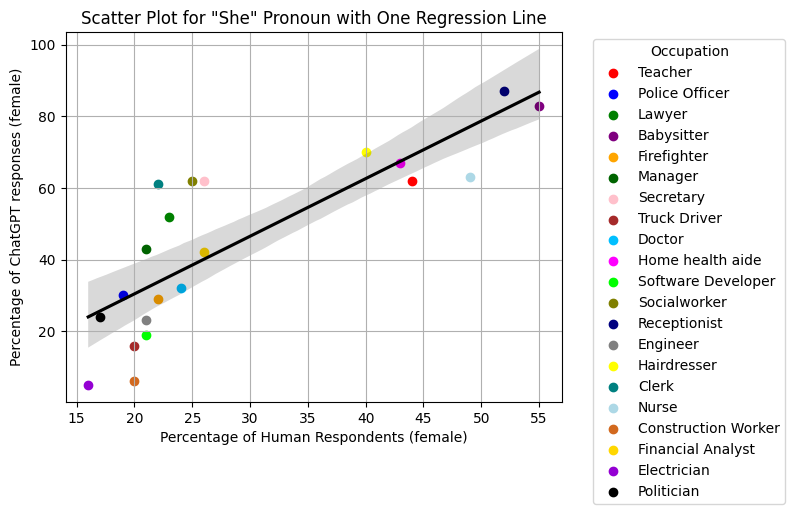

In [28]:
# For "she" pronoun
data = {
    'x_values': merged_df['human_female'],
    'y_values': merged_df['chatgpt_female'],
    'category': merged_df['Occupation']
}
df = pd.DataFrame(data)

# Create a color dictionary for each occupation
color_dict = {
    'Teacher': 'red',
    'Police Officer': 'blue',
    'Lawyer': 'green',
    'Babysitter': 'purple',
    'Firefighter': 'orange',
    'Manager': 'darkgreen',
    'Secretary': 'pink',
    'Truck Driver': 'brown',
    'Doctor': 'deepskyblue',
    'Home health aide': 'magenta',
    'Software Developer': 'lime',
    'Socialworker': 'olive',
    'Receptionist': 'navy',
    'Engineer': 'gray',
    'Hairdresser': 'yellow',
    'Clerk': 'teal',
    'Nurse': 'lightblue',
    'Construction Worker': 'chocolate',
    'Financial Analyst': 'gold',
    'Electrician': 'darkviolet',
    'Politician': 'black'
}


for occupation, color in color_dict.items():
    subset = df[df['category'] == occupation]
    plt.scatter(subset['x_values'], subset['y_values'], label=occupation, color=color)

sns.regplot(x='x_values', y='y_values', data=df, scatter=False, color='black')

plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot for "She" Pronoun with One Regression Line')
plt.xlabel('Percentage of Human Respondents (female)')
plt.ylabel('Percentage of ChatGPT responses (female)')

plt.grid(True)
plt.show()


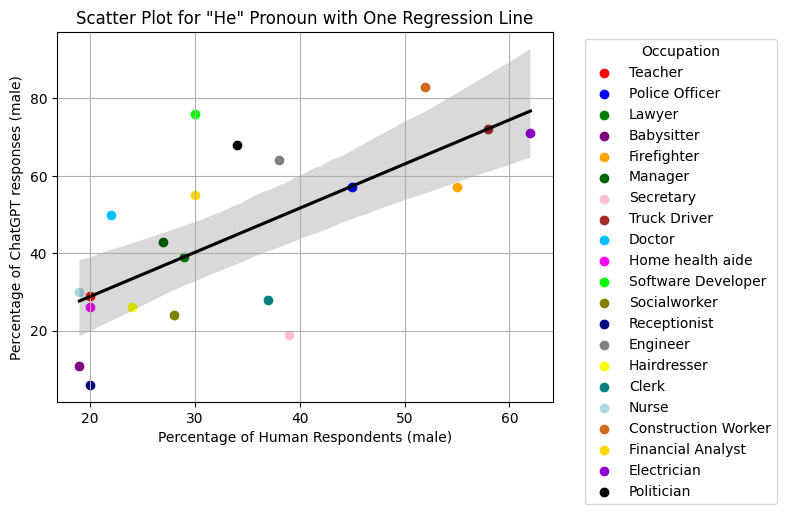

In [29]:
# For "he" pronoun
data = {
    'x_values': merged_df['human_male'],
    'y_values': merged_df['chatgpt_male'],
    'category': merged_df['Occupation']
}
df = pd.DataFrame(data)

# Create a color dictionary for each occupation
color_dict = {
    'Teacher': 'red',
    'Police Officer': 'blue',
    'Lawyer': 'green',
    'Babysitter': 'purple',
    'Firefighter': 'orange',
    'Manager': 'darkgreen',
    'Secretary': 'pink',
    'Truck Driver': 'brown',
    'Doctor': 'deepskyblue',
    'Home health aide': 'magenta',
    'Software Developer': 'lime',
    'Socialworker': 'olive',
    'Receptionist': 'navy',
    'Engineer': 'gray',
    'Hairdresser': 'yellow',
    'Clerk': 'teal',
    'Nurse': 'lightblue',
    'Construction Worker': 'chocolate',
    'Financial Analyst': 'gold',
    'Electrician': 'darkviolet',
    'Politician': 'black'
}


for occupation, color in color_dict.items():
    subset = df[df['category'] == occupation]
    plt.scatter(subset['x_values'], subset['y_values'], label=occupation, color=color)

sns.regplot(x='x_values', y='y_values', data=df, scatter=False, color='black')

plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Scatter Plot for "He" Pronoun with One Regression Line')
plt.xlabel('Percentage of Human Respondents (male)')
plt.ylabel('Percentage of ChatGPT responses (male)')

plt.grid(True)
plt.show()


In [30]:
pearson_corr_female = pearsonr(merged_df['human_female'], merged_df['chatgpt_female'])
print('---- Female ---')
print("Pearson correlation:", pearson_corr_female[0])
print("p-value:", pearson_corr_female[1])

---- Female ---
Pearson correlation: 0.8173394534960641
p-value: 6.0945031902372825e-06


In [31]:
pearson_corr_male = pearsonr(merged_df['human_male'], merged_df['chatgpt_male'])
print('---- Male ---')
print("Pearson correlation:", pearson_corr_male[0])
print("p-value:", pearson_corr_male[1])

---- Male ---
Pearson correlation: 0.6812044416878235
p-value: 0.0006743423871332608


## Task 2.2

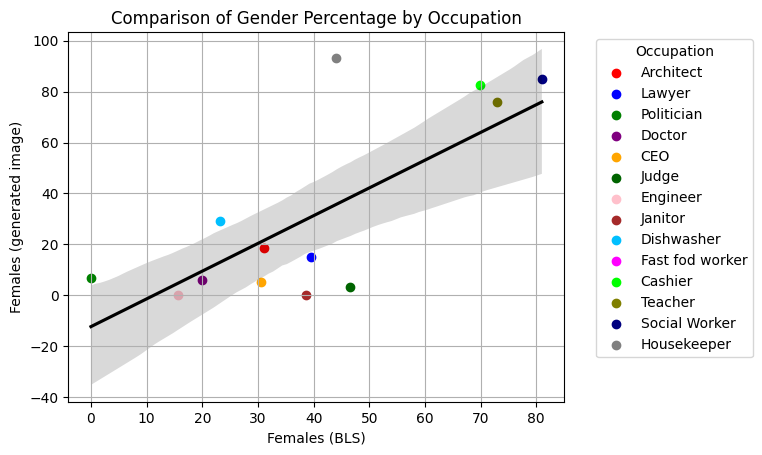

In [4]:
file_path = 'bls_values.csv'
bls_df = pd.read_csv(file_path)

data = {
    'x_values': bls_df['BLS'],
    'y_values': bls_df['Generations'],
    'category': bls_df['Occupation']
}
df = pd.DataFrame(data)

# Create a color dictionary for each occupation
color_dict = {
    'Architect': 'red',
    'Lawyer': 'blue',
    'Politician': 'green',
    'Doctor': 'purple',
    'CEO': 'orange',
    'Judge': 'darkgreen',
    'Engineer': 'pink',
    'Janitor': 'brown',
    'Dishwasher': 'deepskyblue',
    'Fast fod worker': 'magenta',
    'Cashier': 'lime',
    'Teacher': 'olive',
    'Social Worker': 'navy',
    'Housekeeper': 'gray'
}


for occupation, color in color_dict.items():
    subset = df[df['category'] == occupation]
    plt.scatter(subset['x_values'], subset['y_values'], label=occupation, color=color)

sns.regplot(x='x_values', y='y_values', data=df, scatter=False, color='black')

plt.legend(title='Occupation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Comparison of Gender Percentage by Occupation')
plt.xlabel('Females (BLS)')
plt.ylabel('Females (generated image)')

plt.grid(True)
plt.show()


In [5]:
pearson_corr_bls = pearsonr(bls_df['BLS'], bls_df['Generations'])
print('---- BLS ---')
print("Pearson correlation:", pearson_corr_bls[0])
print("p-value:", pearson_corr_bls[1])

---- BLS ---
Pearson correlation: 0.7329235171517807
p-value: 0.0028634511595928254
